# Bank Churn Prediction With SMOTE And Neural Network
# By Charles Kilpatrick


## Background and Context

Businesses like banks that provide services have to consider the problem of 'Churn' which is having customers leave and possibly become a customer of another bank. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.


### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer
* Surname: Last name of the customer
* CreditScore: It defines the credit history of the customer.  
* Geography: A customer’s location    
* Gender: It defines the Gender of the customer   
* Age: Age of the customer     
* Tenure: Number of years for which the customer has been with the bank
* NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
* Balance: Account balance
* HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
* EstimatedSalary: Estimated salary
* isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active   member in the sense, using bank products regularly, making transactions, etc )
* Exited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two   values: 0=No ( Customer did not leave the bank ) 1=Yes ( Customer left the bank )

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import model_selection
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
#from tensorflow.python.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras.layers import BatchNormalization
from tensorflow.keras import backend
# Importing shuffle
from random import shuffle
from keras.callbacks import ModelCheckpoint
#Importing classback API
from keras import callbacks
# Importing optimizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Adagrad

import random
from tensorflow.keras import backend
random.seed(1)
np.random.seed(1)
tf.random.set_seed(1)

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")


### Use GPU if available

In [2]:
#!pip install tensorflow

import tensorflow as tf

# Get the list of available physical devices
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    # If a GPU is available, use it
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    device = "/GPU:0"
    print("Using GPU")
else:
    # If no GPU is available, use CPU
    device = "/CPU:0"
    print("Using CPU")

# Create a TensorFlow device context manager
# with tf.device(device):



Using GPU


### Loading the Data

In [3]:
# Mount Google drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/Churn.csv')

In [5]:
# Read data
#Data = pd.read_csv('Churn.csv')

In [6]:
# Create copy of data
df = data.copy()

In [7]:
# Check the number of rows and columns in the data
df.shape

(10000, 14)

* The dataset has 10000 rows and 14 columns

### Data Overview

In [8]:
# Let's view the first 5 rows of the data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
# Let's view the last 5 rows of the data
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
# Let's check the datatypes of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.


In [11]:
# Let's check for duplicate values in the data
df.duplicated().sum()

0

In [12]:
# Let's check for missing values in the data
round(df.isnull().sum() / df.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [13]:
# Let's view the statistical summary of the numerical columns in the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


**Observations**

* RowNumber - This feature does not contribute to the analysis of the data, to be deleted
* Customerid - This feature identifying individual customers does not contribute to the analysis of the data, to be deleted
* CreditScore - Mean of 650.5 is less than 652.0 median. Minimum is 350.0 and maximum is 850.0 The standard deviation is 96.6
* Age - Mean of 38.9 is less than 37.0 median. Minimum is 18.0 and maximum is 92.0. Standard deviation is 10.5
* Tenure - Mean of 5.0 is equal to 5.0 median. Minimum is 0.0 and maximum is 10.0. Standard deviation is 2.9
* Balance - Mean of 76485.9 is less than 97198.5 median. Minimum is 0.0 and maximum is 250898.0. Standard deviation is 62397.4
* NumOfProducts - Mean of 1.5 is greater than 1.0 median. Minimum is 1.0 and maximum is 4.0. Standard deviation is 0.6
* HasCrCard - This is a categorical with a value of either 0 (doesn't have credit card) or 1 (has credit card)
* IsActiveMember - This is a categorical with a value of either 0 (not active member) or 1 (is active member)
* EstimatedSalary-Mean of 100090.2 is greater than 100193.9 median. Minimum is near 0 and maximum is 4.0. Stand dev. is 57510.5
* Exited - This is a categorical with a value of either 0 (did not exit) or 1 (exited)


In [14]:
# Let's check the number of unique values in each column
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Observations**

* Customerid and RowNumber are numerical features which add no value to the analysis and will be deleted.
* Cutomer surname is a categorical feature with 2932 unique values, it adds no value for the data analysis and will be deleted.
* CreditScore is a numerical feaure with 460 unique values.
* Geography is a categorical feature with 3 unique values.
* Gender is a categorical value with 2 unique values.
* Tenure is a numerical feature which has 11 unique values.
* Balance is a numerical feature with 6382 unique values.
* NumOfProducts is a numerical feature with 4 unique values.
* IsActiveMember is a categorical feature with 2 unique values.
* Estimated Salary is a numerical feature with 9999 unique values.
* Exited is a categorical feature with 2 unique values.

In [15]:
# Determine the unique value counts (other than numerical variables)
# Make list of columns for unique value counts
cols_cat = [
    "Geography",
    "Gender",
    "Tenure",
    "NumOfProducts",
    "HasCrCard",
    "IsActiveMember",
    "Exited"
]

# Print unique categorical level counts for each column
for column in cols_cat:
    print(df[column].value_counts())
    print("-" * 20)

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
--------------------
Male      5457
Female    4543
Name: Gender, dtype: int64
--------------------
2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64
--------------------
1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64
--------------------
1    7055
0    2945
Name: HasCrCard, dtype: int64
--------------------
1    5151
0    4849
Name: IsActiveMember, dtype: int64
--------------------
0    7963
1    2037
Name: Exited, dtype: int64
--------------------


**Observations**

* The geographical distribution is 50.1% France, 25.1% Germany, and 24.8% Spain.
* The dataset is 54.6% male and 45.4% female.
* The modal value for Tenure is 2 with 1048 data points and the second most frequent is 1 with 1035 data points.
* The modal value for NumOfProducts is 1 with 5084 data points and the second most frequent is 2 with 4590 data points.
* Credit card holders are 70.6% of the customers and 29.4% of the customers do not hold credit cards.
* Active members make up 51.5% of the data points and 48.5% of the data set are not active members.
* Customers who did not exit are 79.6% of the data set and customers who did exit are 20.4% of the data set.

In [16]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [17]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## **EDA**

### Univariate Analysis

**Observations**

The following features will not undergo further analysis as they do not add value and will be dropped during the data preprocessing step:

* RowNumber - Row number of individual records
* CustomerId - Individual customer ID number
* Surname - Individul customer lasy name

In [18]:
# Define categorical values to ensure there is no numerical significance imparted by encoding

cat_col = [
    "Geography",
    "Gender",
    "HasCrCard",
    "IsActiveMember"
]

for colname in cat_col:
    df[colname] = df[colname].astype("category")



In [19]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

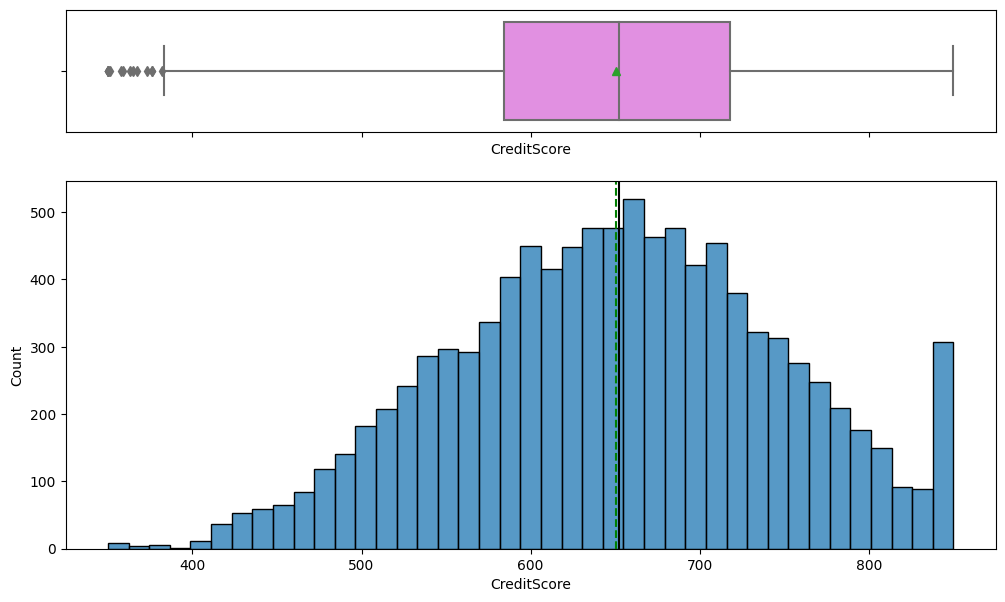

In [20]:
histogram_boxplot(df, "CreditScore")

CreditScore is very slightly right skewed with mean of 650.5 slightly less than the median of 652.0.  There are outliers less than the left whisker value of 383.0 which will be addressed by minmax scaling.

*

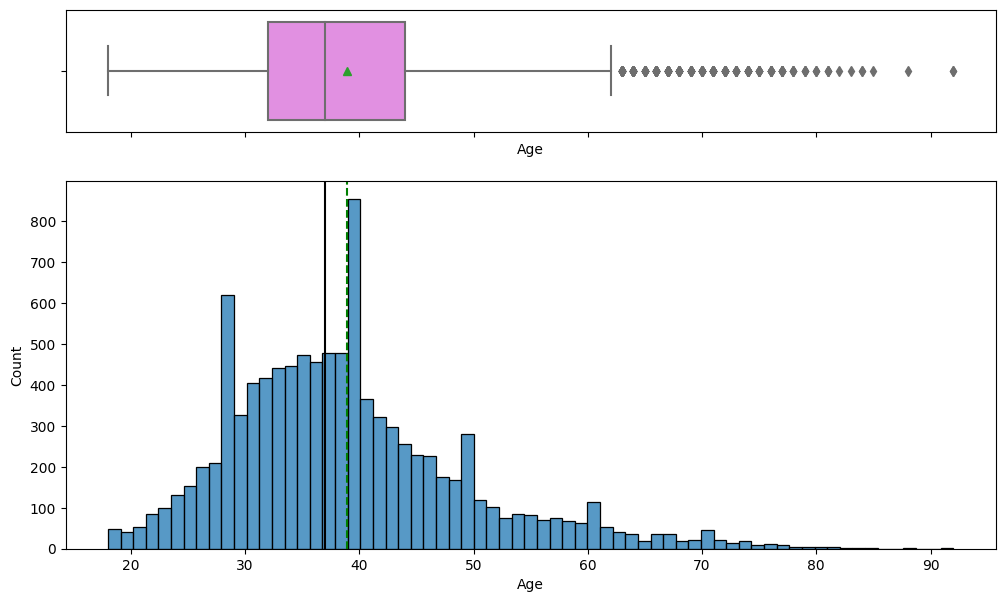

In [21]:
histogram_boxplot(df, "Age")

Age is right skewed with the mean of 38.9 greter than 37.0.  There are outliers greater than the right whisker of 62.0. This appears to be valid data which will be addressed with minmax scaling.

*

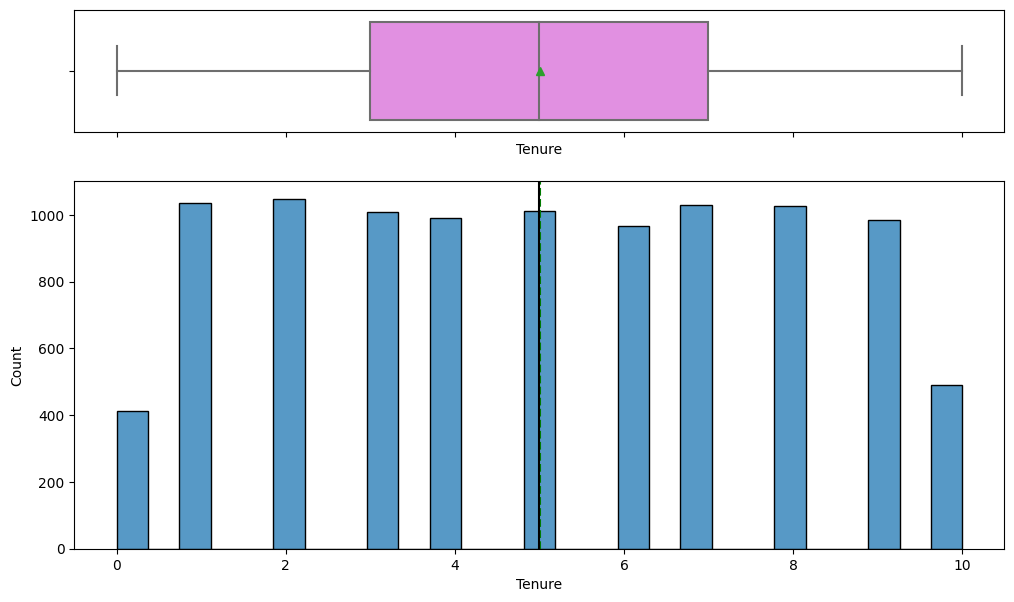

In [22]:
histogram_boxplot(df, "Tenure")

Tenure is normally distributed and there are no outliers in the data.

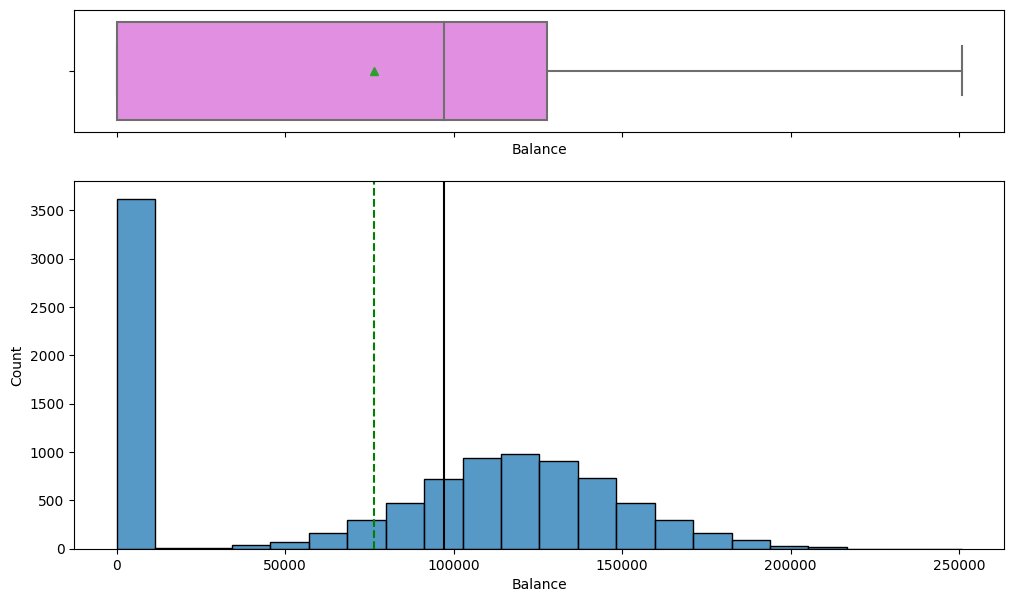

In [23]:
histogram_boxplot(df, "Balance")

Balance is left skewed with the mean of 76485.9 significantly less than the median of 97198.5. It appears to be valid that a number of customers choose to maintain a 0 balance. Minmax scaling will be applied to this variable.

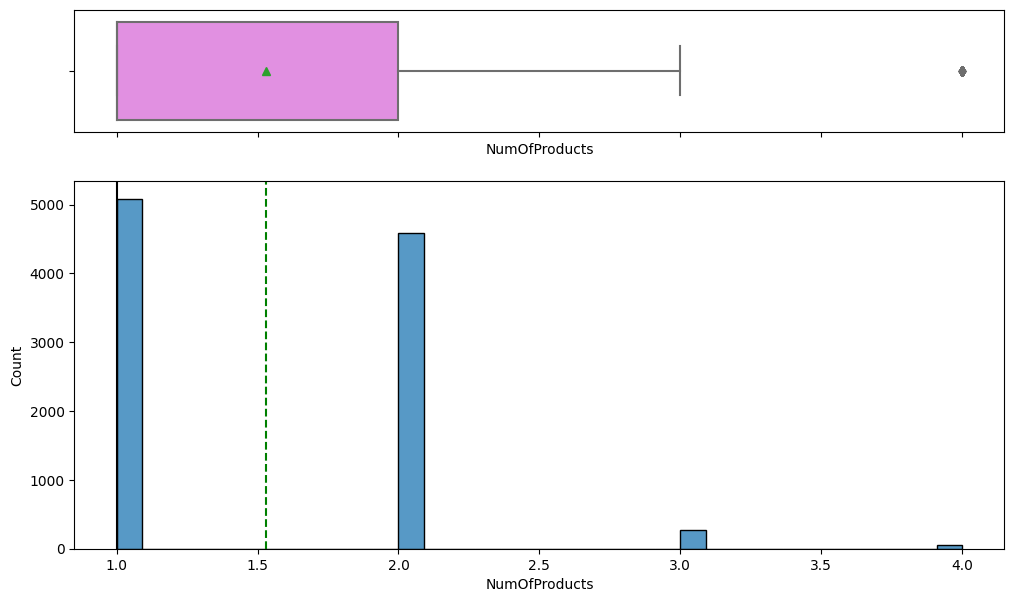

In [24]:
histogram_boxplot(df, "NumOfProducts")

NumOfProducts is right skewed with the mean of 1.5 greater than the median of 1.0. There are outliers greater than the right whisker value of 3.5.  The outliers appear to be valid.  Minmax scaling will be applied to this variable.

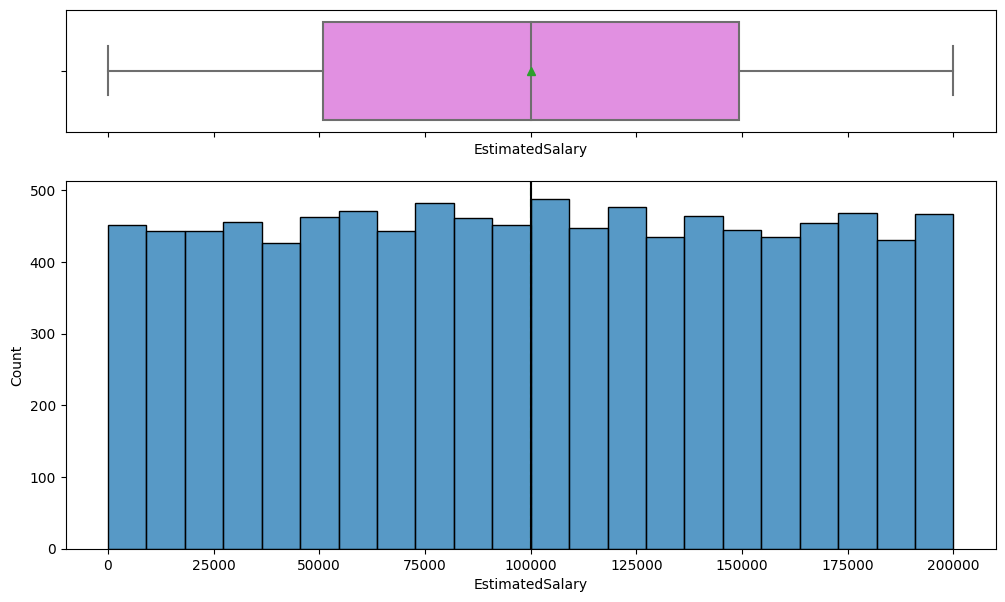

In [25]:
histogram_boxplot(df, "EstimatedSalary")

The EstimatedSalary is almost uniformly distributed from an essentially zero value to 200000. It is reasonable that some customers have zero salary as they may be retired and have income from other sources. Minmax scaling will be applied to this feature.   

In [26]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

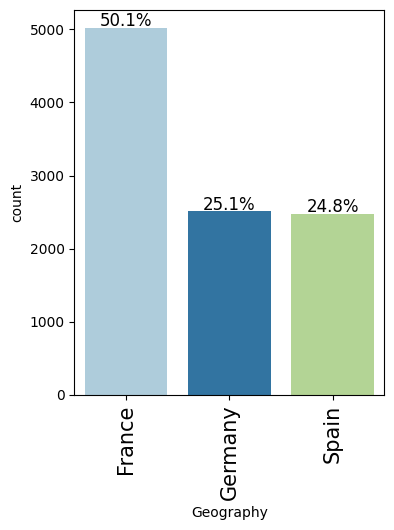

In [27]:
labeled_barplot(df, "Geography", perc = True)

* Customers in France comprise 50.1% of the data set.
* Customers in Germany comprise 25.1% of the data set.
* Customers in Spain comprise 24.8% of the data set.

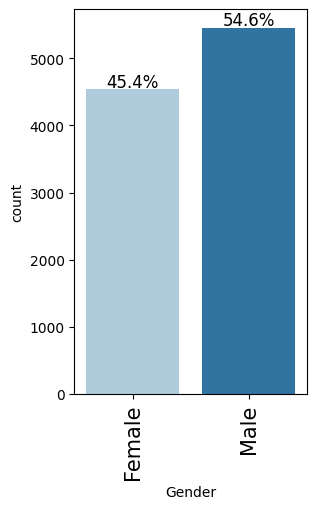

In [28]:
labeled_barplot(df, "Gender", perc = True)

* Females comprise 45.4% of the data set.
* Males comprise 54.6 % of the data set.

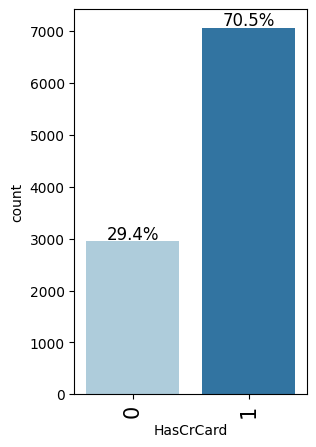

In [29]:
labeled_barplot(df, "HasCrCard", perc = True)

* Customers who do not have credit cards are 29.4% of the data set.
* Customers who have credit cards are 70.5% of the data set.


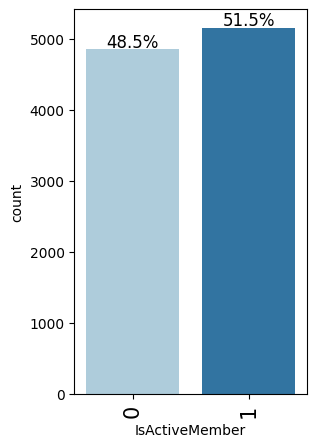

In [30]:
labeled_barplot(df, "IsActiveMember", perc = True)

* The data set is comprised of 48.5% who are not active members.
* The data set is comprised of 51.5% who are active members.

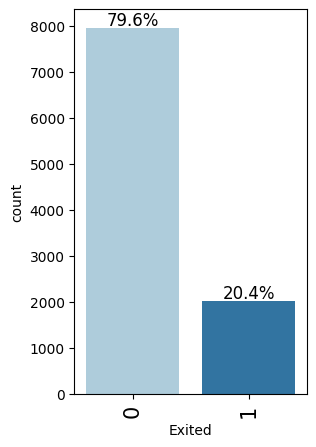

In [31]:
labeled_barplot(df, "Exited", perc = True)

* The data is significantly imbalanced with a relatively small minority class of those who exited.
* The data set is comprised of 79.6% who did not exit.
* The data set is comprised of 20.4% who did exit.

In [32]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

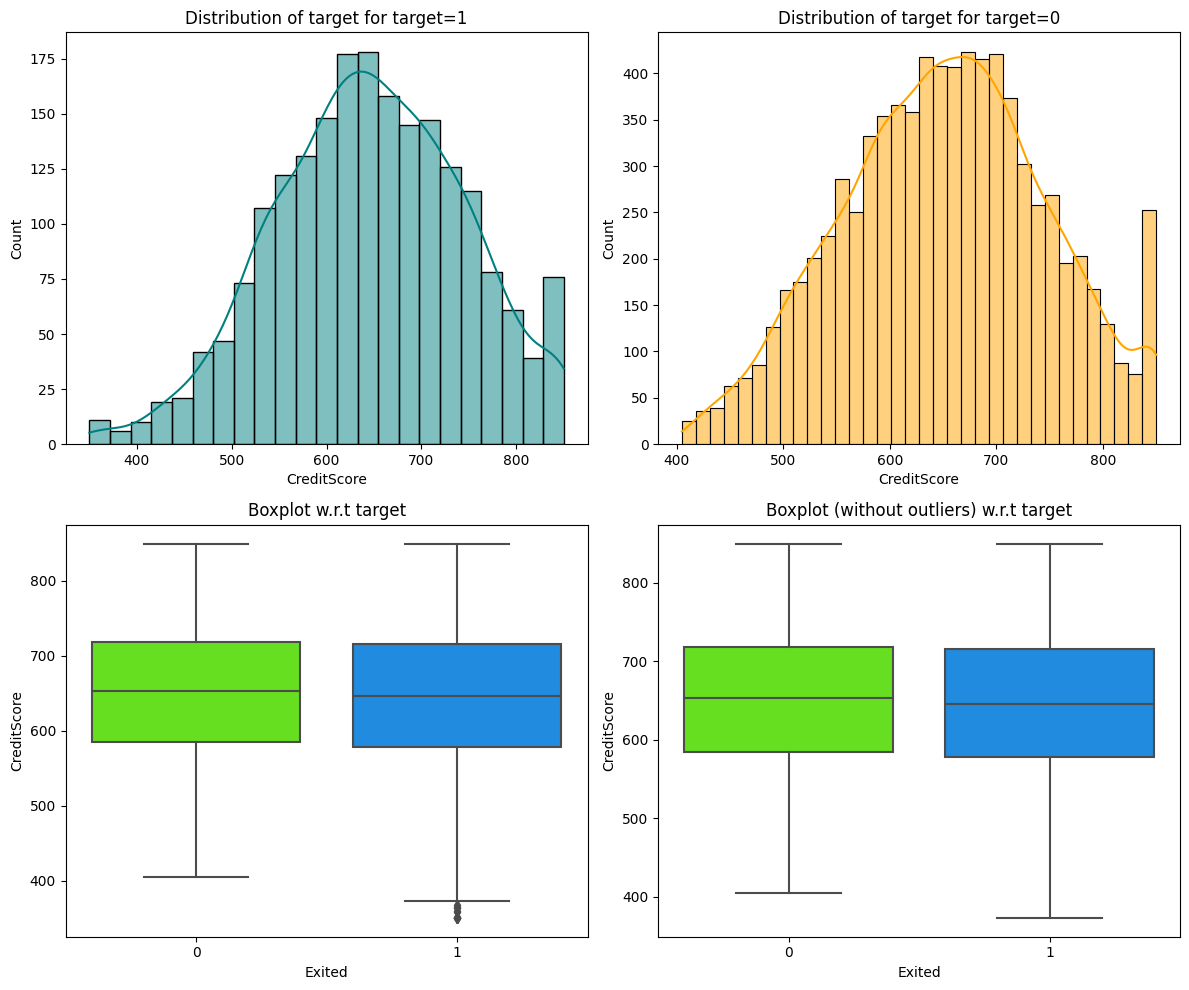

In [33]:
distribution_plot_wrt_target(df, "CreditScore", "Exited")

* CreditScore has low outliers among those who exited.
* Customers who have not exited tend to have slightly greater credit score regardless of whether outliers are considered.

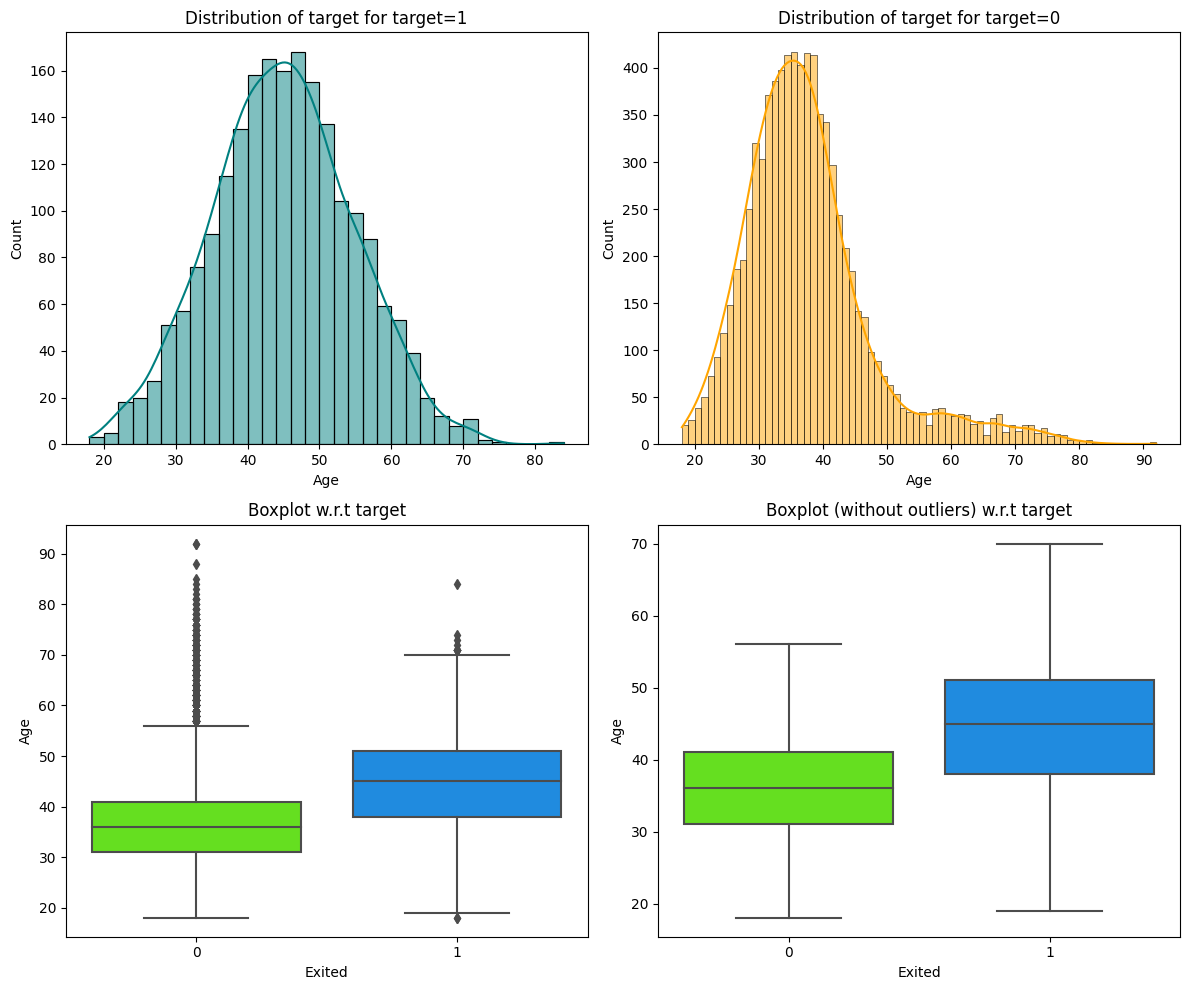

In [34]:
distribution_plot_wrt_target(df, "Age", "Exited")

* Age has high outliers both for those who exited and those who did not exit.
* Those who exited tend to be older than those who did not exit.  This applies whether or not outliers are considered.

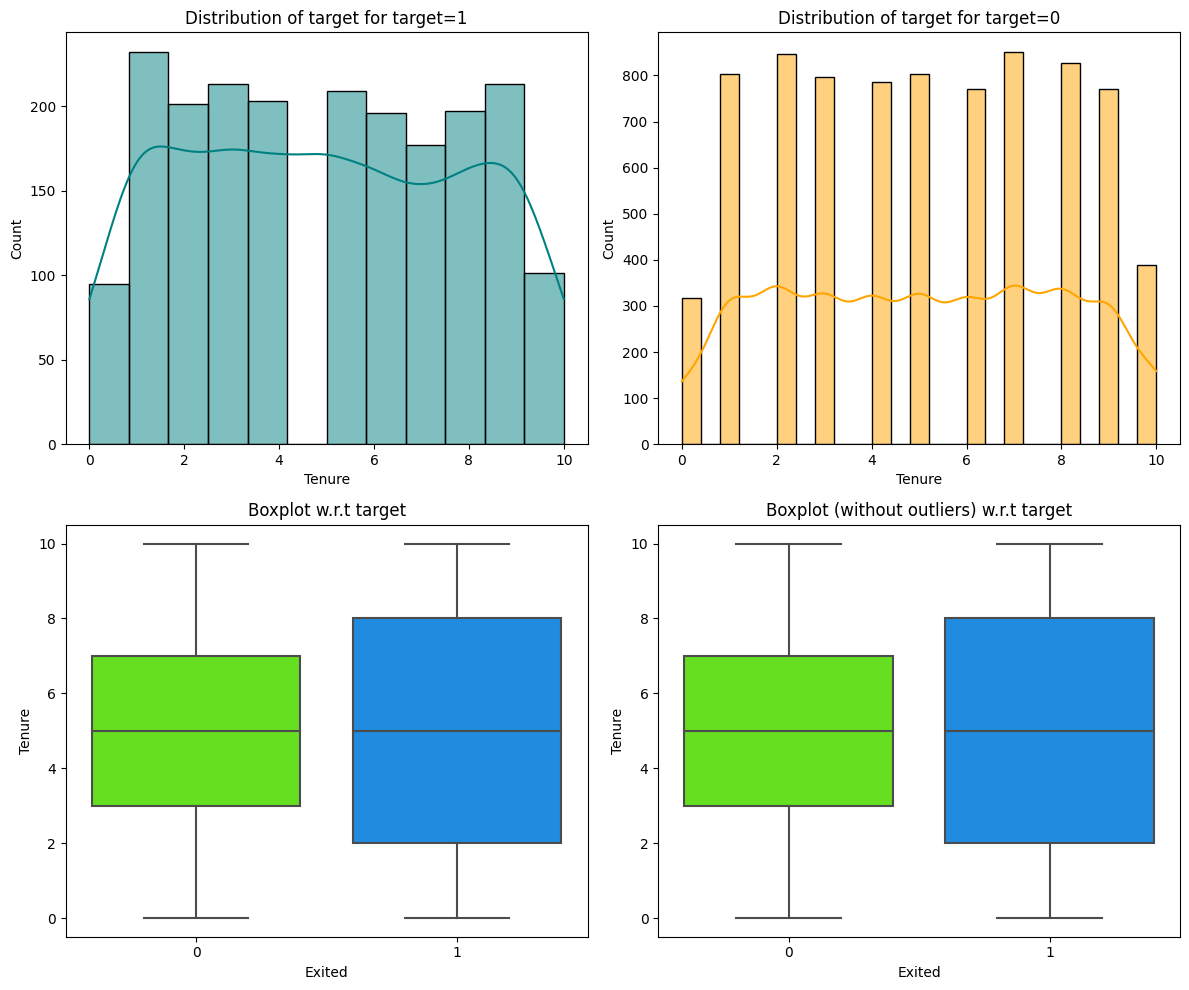

In [35]:
distribution_plot_wrt_target(df, "Tenure", "Exited")

* There are no outliers in the data.
* The median of the data for those who exited and those who did not exit are approximately equal, the IQR for those who exited is significantly greater than the IQR of those who did not exit.

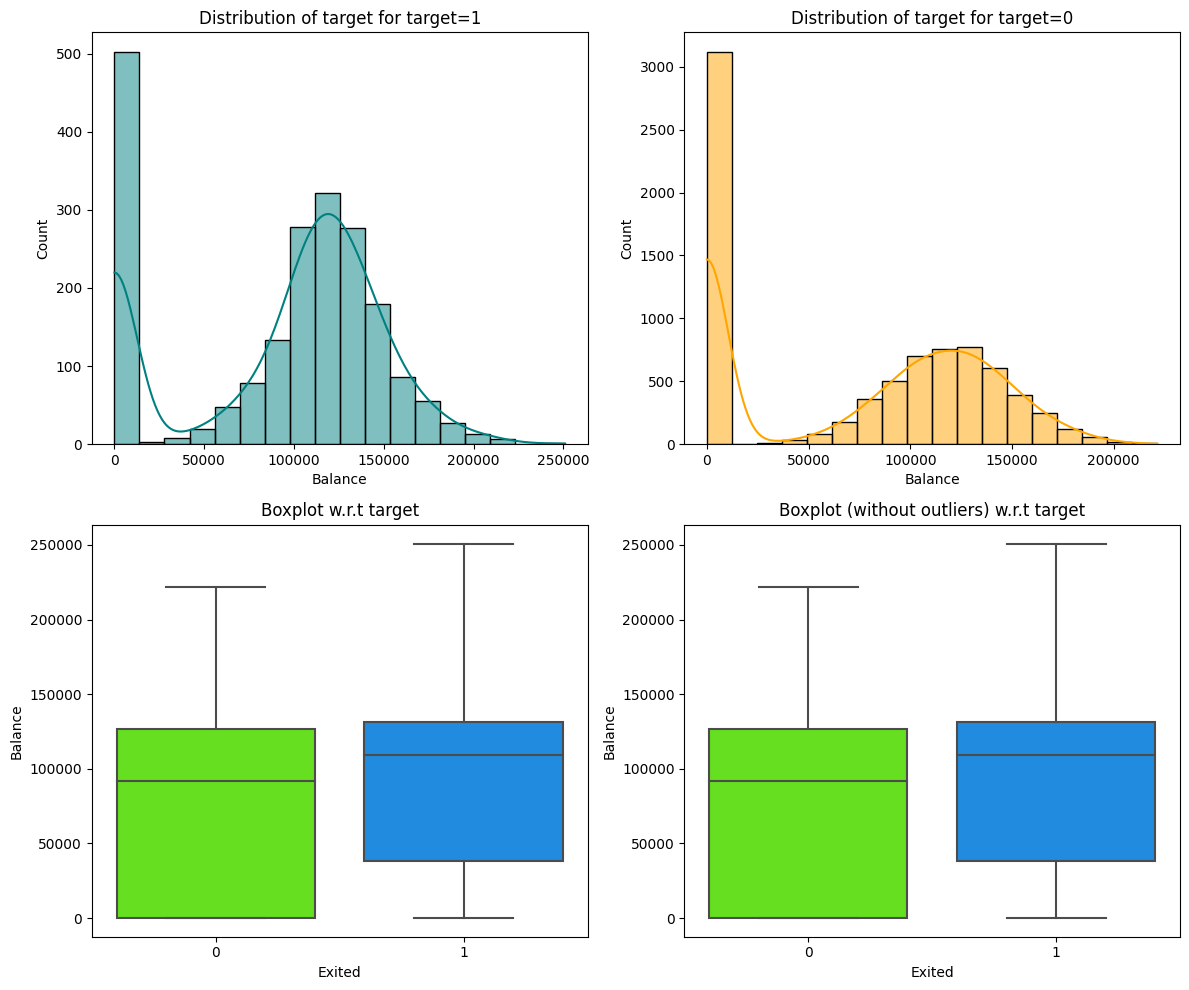

In [36]:
distribution_plot_wrt_target(df, "Balance", "Exited")

* There are no outliers in the data.
* There is a significant proportion of the data set with balance 0 for both those who exited and those who did not exit.
* Those who exited have a greater median balance than those who did not exit.

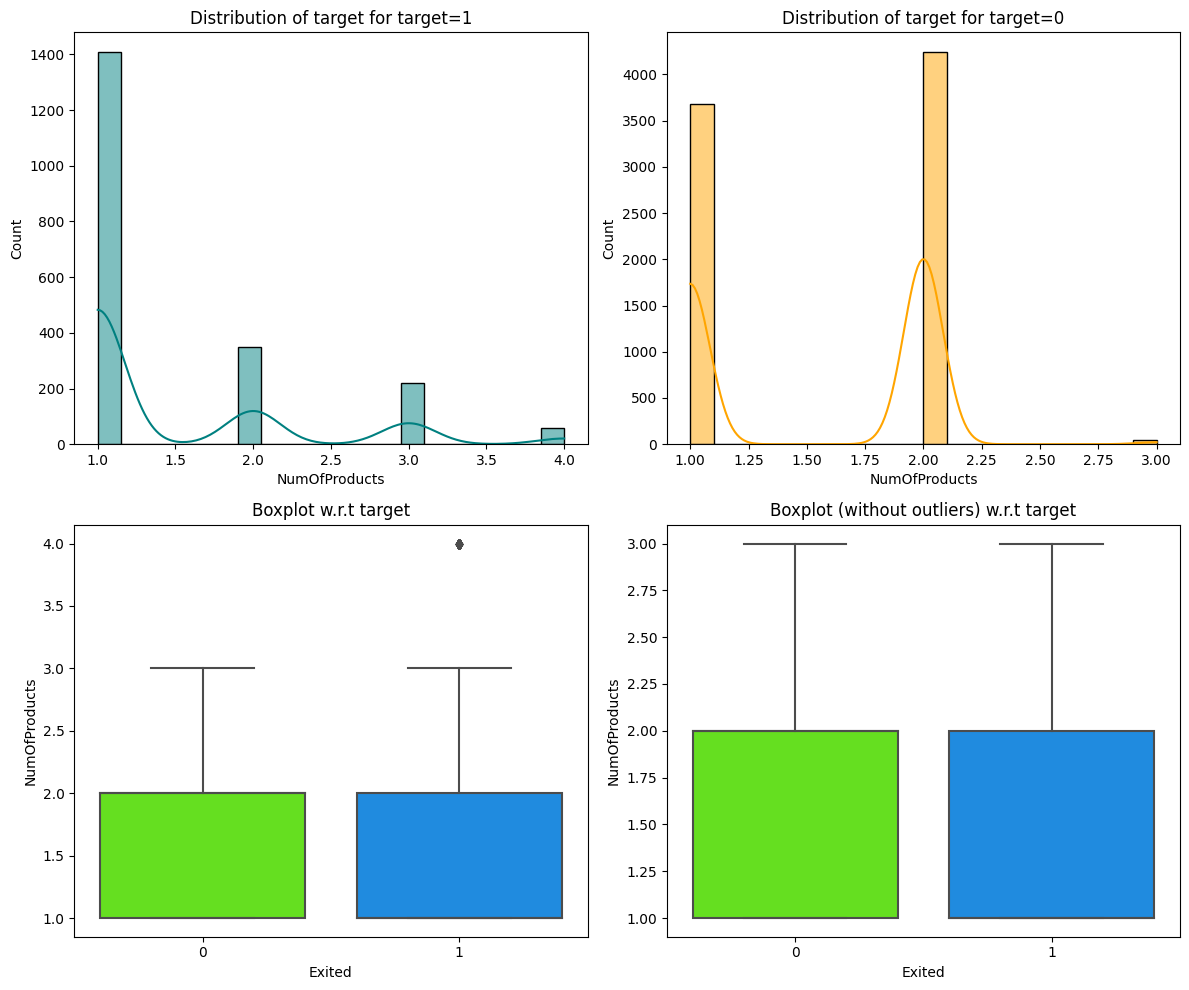

In [37]:
distribution_plot_wrt_target(df, "NumOfProducts", "Exited")

* NumOfProducts has high outliers for those who exited.
* The modal for NumOfProducts is 1.0 for those who exited and 2.0 for those who did not exit.

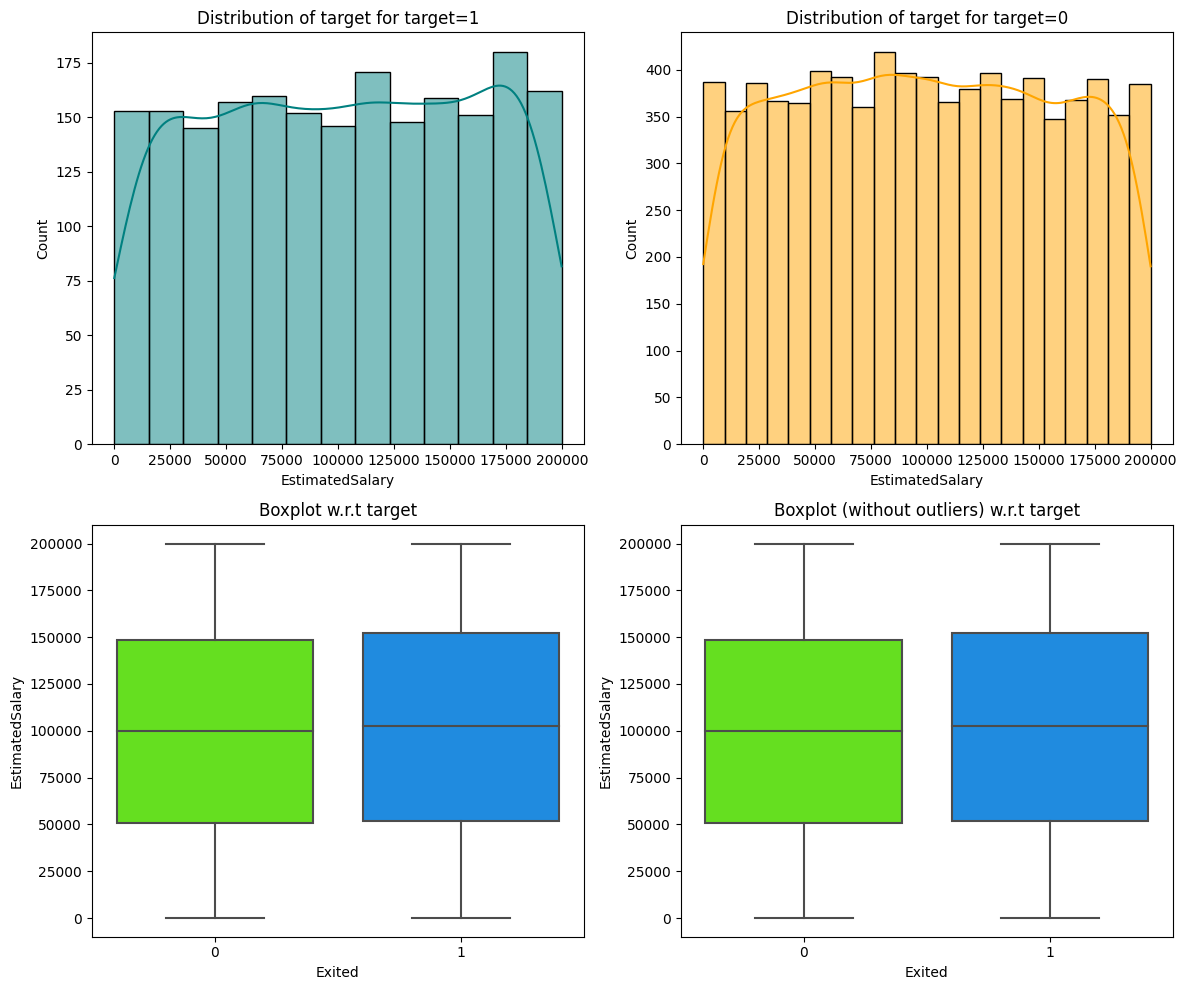

In [38]:
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

* There are no outliers in the data.
* EstimatedSalary is uniformly distributed between 0 to 200000 for those who did exit and those who did not exit.
* The data points with near 0 values for estimated salary are attributed to those living on retirement or investment income.


# Multivariate Analysis¶

In [39]:
# Define features to be included in heatmap and pairplot
num_col = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "HasCrCard", "IsActiveMember", "Exited"]

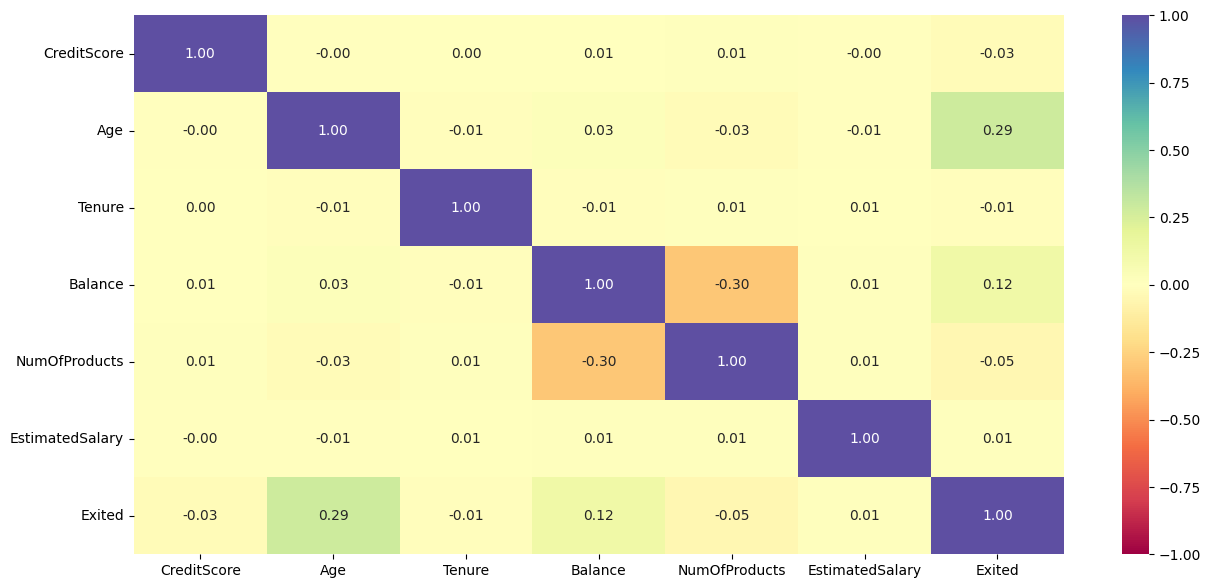

In [40]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

* There is a very weak negative correlation between Balance and NumOfProducts.
* There is a very weak positive correlation between Age and Exited.
* There is almost no correlation among other variable pairs.


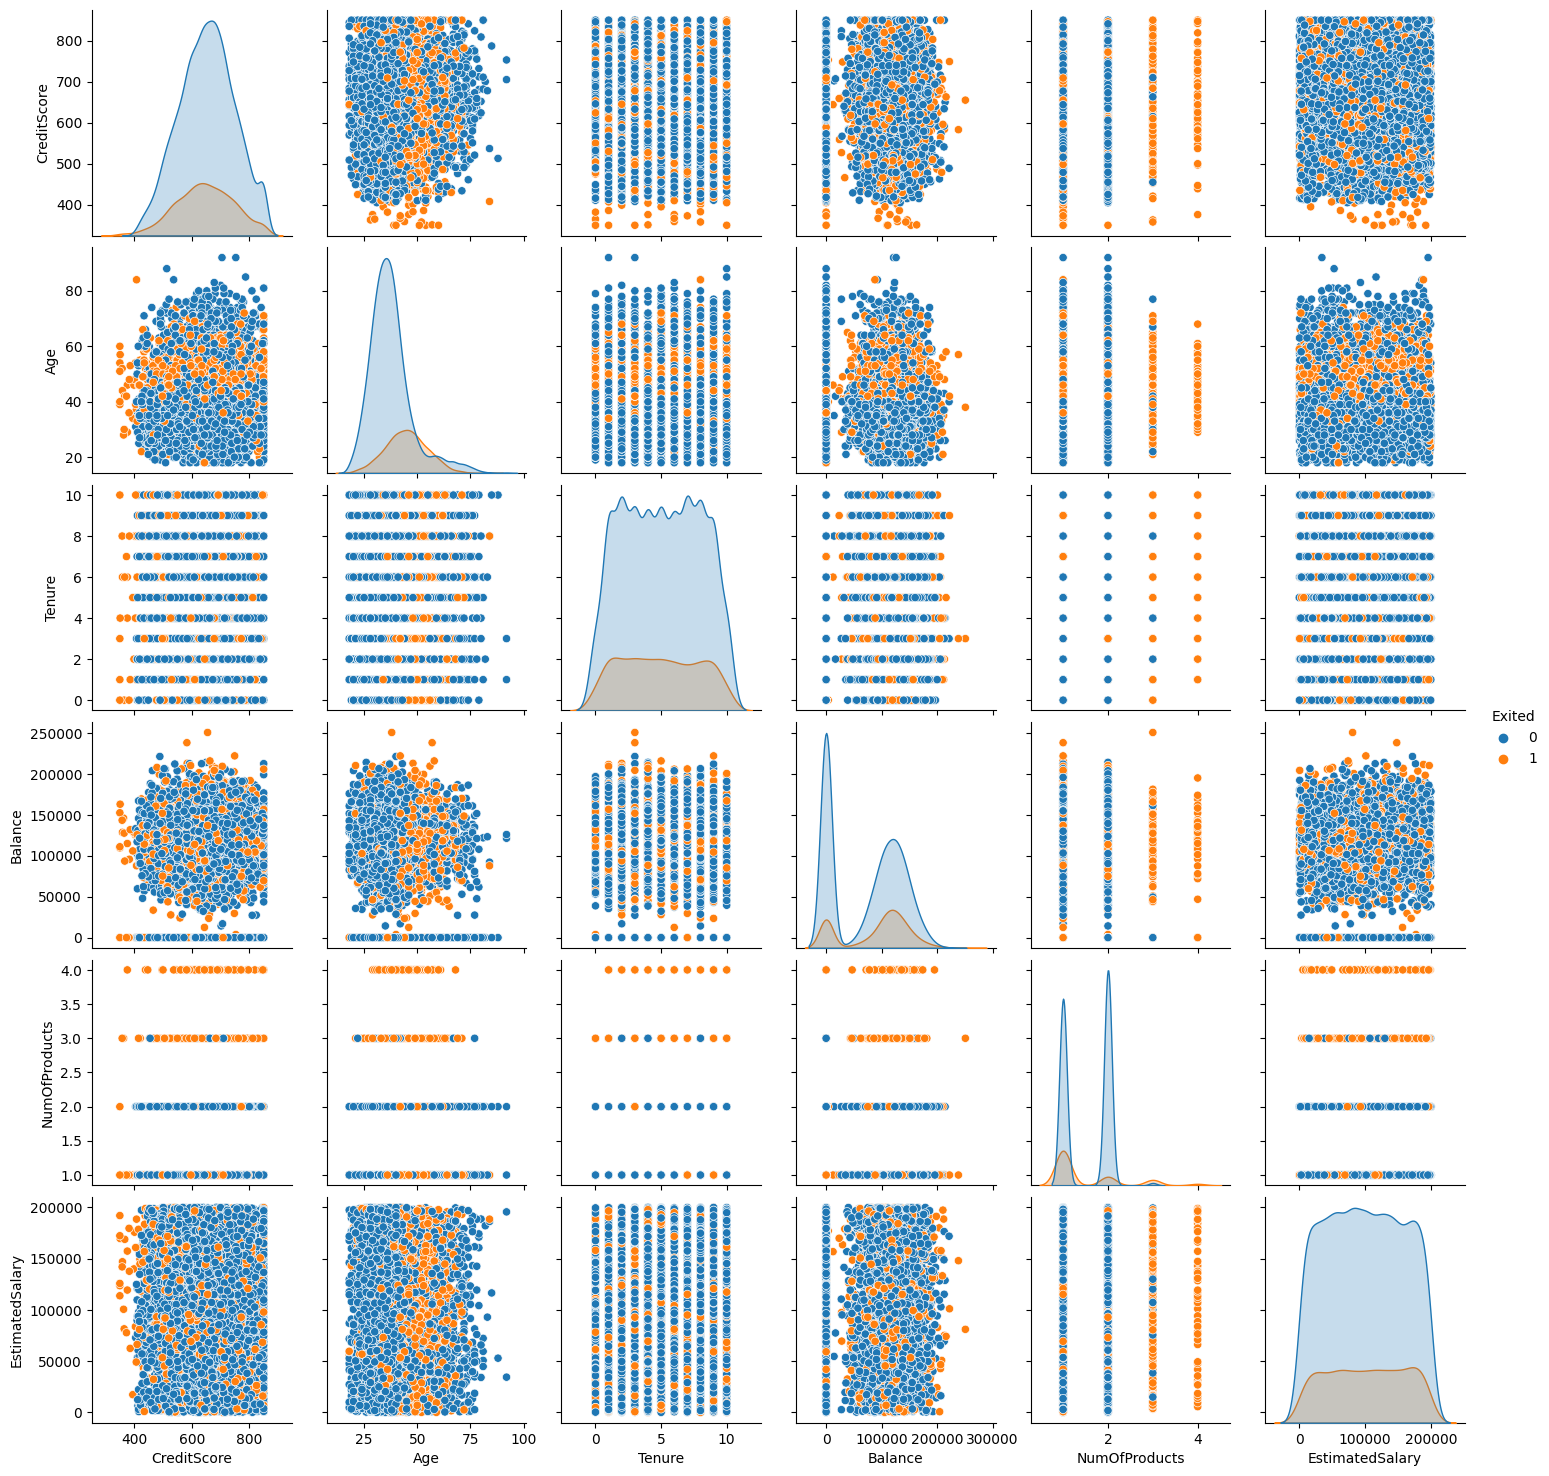

In [41]:
sns.pairplot(data=df[num_col], diag_kind="kde", hue = "Exited")
plt.show()

**Observations**
* NumOfProducts across the entire range of CreditScore is predominately 3 or 4 for customers who Exited, while NumOfProducts for those who did not exit is predominately 1 or 2 across the entire range of CreditScore.
* NumOfProducts is quite independent of the tenure. Customers do not appear to accumumulate more products as tenure increases.
* Balance does not increase with respect to an increase in NumOfProducts
* Those who exited appear to be concentrated around an age of 50.


In [42]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


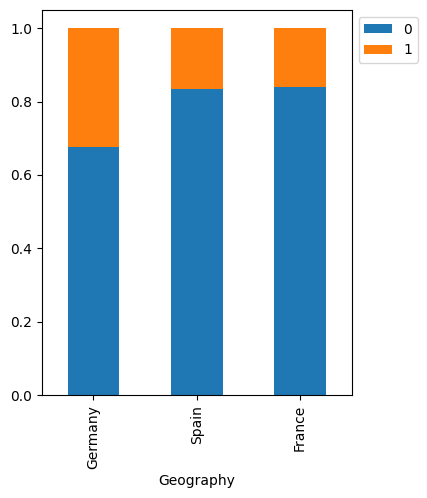

In [43]:
stacked_barplot(df, "Geography", "Exited")

* 32.4% of German customers exited and 67.6% did not exit.
* 16.2% of Spanish customers exited and 83.8% did not exit.
* 16.7% of French customers exited 83.3% did not exit.

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


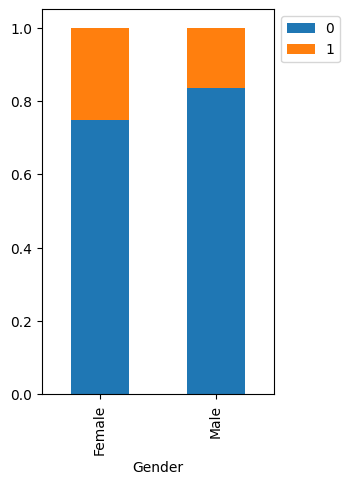

In [44]:
stacked_barplot(df, "Gender", "Exited")

* 25.1% of female customers exited and 74.9% did not exit.
* 16.5% of male customers exited and 83.5% did not exit.

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


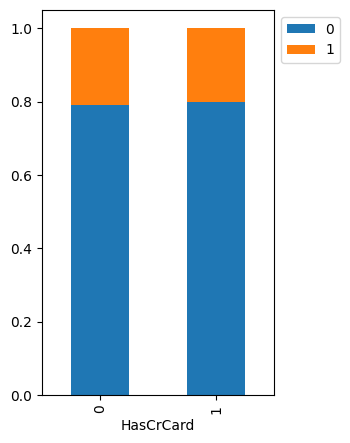

In [45]:
stacked_barplot(df, "HasCrCard", "Exited")

* 20.2% of customers true for HasCrCard exited and 79.8% did not exit.
* 20.8% of customers false for HasCrCard exited and 79.2% did not exit.

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


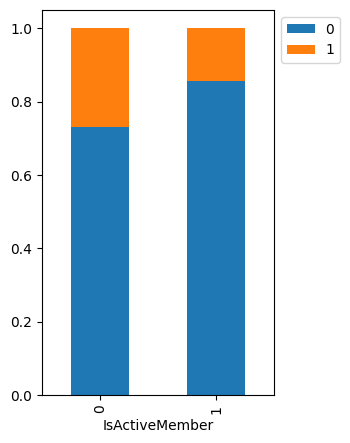

In [46]:
stacked_barplot(df, "IsActiveMember", "Exited")

* 14.3% of customers true for IsActiveMember exited and 85.7 did not exit.
* 26.9% of customers false for IsActiveMember exited and 73.1 did not exit.

### Compare Numerical Features For Customers Who Exited and Those Who Did Not Exit
### Note that the target variable data is significantly imbalanced with a small minority class who exited

In [47]:
# The following features will be dropped as they do not add value in predicting customer churn
df.drop(columns = ["RowNumber", "CustomerId", "Surname"], inplace=True)

In [48]:
# Further investigation of customers who did not exit
df_noexit = df[df["Exited"] ==0]

In [49]:
# View the statistical summary of the numerical columns in the data for customers did not exit
df_noexit.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,7963.0,651.853196,95.653837,405.00,585.00,653.00,718.000,850.00
Age,7963.0,37.408389,10.125363,18.00,31.00,36.00,41.000,92.00
Tenure,7963.0,5.033279,2.880658,0.00,3.00,5.00,7.000,10.00
Balance,7963.0,72745.296779,62848.040701,0.00,0.00,92072.68,126410.280,221532.80
NumOfProducts,7963.0,1.544267,0.509536,1.00,1.00,2.00,2.000,3.00
EstimatedSalary,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
Exited,7963.0,0.000000,0.000000,0.00,0.00,0.00,0.000,0.00


* A comparison of numerical features for customers who exited and those who did not exit will be presented below.

In [50]:
# Further investigation of customers who did exit
df_exit = df[df["Exited"] ==1]

In [51]:
# Let's view the statistical summary of the numerical columns in the data for customers did exit
df_exit.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,2037.0,645.351497,100.321503,350.00,578.00,646.00,716.00,850.00
Age,2037.0,44.837997,9.761562,18.00,38.00,45.00,51.00,84.00
Tenure,2037.0,4.932744,2.936106,0.00,2.00,5.00,8.00,10.00
Balance,2037.0,91108.539337,58360.794816,0.00,38340.02,109349.29,131433.33,250898.09
NumOfProducts,2037.0,1.475209,0.801521,1.00,1.00,1.00,2.00,4.00
EstimatedSalary,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.91,199808.10
Exited,2037.0,1.000000,0.000000,1.00,1.00,1.00,1.00,1.00


**Comparison of Customers Who Did Exit With Those Who Did Not Exit**
* The 2037 customers who exited are the key customers who should be targeted by a retention program.

* The mean credit score for customers who exited is 645.4 and is less than the 651.9 mean credit score for customers who did not exit. The median credit score for customers who did exit is 646.0 and is less than the median credit score of 653 for customers who did not exit. The minimum credit score of 350 for customers who exited is less than the minimum credit score of 405 for those who did not exit.

* The mean age of customers who exited is 44.8 and is significantly greater than the mean age of 37.4 for customers who did not exit. The median age of customers who did exit is 45.0 and is significantly greater than the median age of 36.0 for customers who did not exit. The minimum age of customers who did exit and for those who did not exit is identical at 18.0.

* The mean tenure of customers who exited is 4.9 and is close to the mean tenure of 5.0 for customers who did not exit. The median tenure for customers who did exit is 5.0 and is close to the median tenure of 5.0 for customers who did not exit. The minimum tenure for customers who did exit and for those who did not exit is identical at 0.0.

* The mean balance of customers who exited is 91,108.5 and is significantly greater than the mean balance of 72745.3 for customers who did not exit. The median balance of customers who did exit is 109349.3 and is significantly greater than the median balance of 92072.7 for customers who did not exit. The minimum balance for customers who did exit and for those who did not exit is identical at 0.0.

* The mean number of products for customers who exited is 1.5 and is equal to the mean number of products for customers who did not exit. The median number of products for customers who did exit is 1.0 and is less than the median number of products of 2.0 for customers who did not exit. The minimum number of products for customers who did exit and for those who did not exit is identical at 1.0.

* The mean estimated salary for customers who exited is 101465.7 is slightly greater than the mean estimated salary of 99738.4 for customers who did not exit. The median estimated salary for customers who did exit is 102460.8 and is slightly greater than the median estimated salary of 99645.0 for customers who did not exit.


## Data Pre-processing

In [52]:
X = df.drop(['Exited'], axis=1)

Y = df['Exited']

In [53]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 10000 entries, 0 to 9999
Series name: Exited
Non-Null Count  Dtype
--------------  -----
10000 non-null  int64
dtypes: int64(1)
memory usage: 78.2 KB


In [54]:
# Splitting the dataset into the Training and Testing set.

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1,stratify = Y)

In [55]:
#Implement standard scaler
std_scaler = MinMaxScaler()

# fit_transform requires a DataFrame, not a Series, hence
# the double brackets to keep df[["CreditScore"]] as a 1 column
# DataFrame rather than a Series, like done with df["CreditScore_std"]

# Standardize training data numerical features
X_train["CreditScore_std"] = std_scaler.fit_transform(X_train[["CreditScore"]])
X_train["Age_std"] = std_scaler.fit_transform(X_train[["Age"]])
X_train["Tenure_std"] = std_scaler.fit_transform(X_train[["Tenure"]])
X_train["Balance_std"] = std_scaler.fit_transform(X_train[["Balance"]])
X_train["NumOfProducts_std"] = std_scaler.fit_transform(X_train[["NumOfProducts"]])
X_train["EstimatedSalary_std"] = std_scaler.fit_transform(X_train[["EstimatedSalary"]])

In [56]:
# Standardize testing data numerical features
X_test["CreditScore_std"] = std_scaler.fit_transform(X_test[["CreditScore"]])
X_test["Age_std"] = std_scaler.fit_transform(X_test[["Age"]])
X_test["Tenure_std"] = std_scaler.fit_transform(X_test[["Tenure"]])
X_test["Balance_std"] = std_scaler.fit_transform(X_test[["Balance"]])
X_test["NumOfProducts_std"] = std_scaler.fit_transform(X_test[["NumOfProducts"]])
X_test["EstimatedSalary_std"] = std_scaler.fit_transform(X_test[["EstimatedSalary"]])

In [57]:
# Drop non-standardized numerical features from training data
X_train.drop(["CreditScore"], axis=1, inplace=True)
X_train.drop(["Age"], axis=1, inplace=True)
X_train.drop(["Tenure"], axis=1, inplace=True)
X_train.drop(["Balance"], axis=1, inplace=True)
X_train.drop(["NumOfProducts"], axis=1, inplace=True)
X_train.drop(["EstimatedSalary"], axis=1, inplace=True)

In [58]:
# Drop non-standardized numerical features from testing data
X_test.drop(["CreditScore"], axis=1, inplace=True)
X_test.drop(["Age"], axis=1, inplace=True)
X_test.drop(["Tenure"], axis=1, inplace=True)
X_test.drop(["Balance"], axis=1, inplace=True)
X_test.drop(["NumOfProducts"], axis=1, inplace=True)
X_test.drop(["EstimatedSalary"], axis=1, inplace=True)

### One Hot Encode Categorical Columns

In [59]:
# Define list for one hot encoding
oneHotCols=["Geography","Gender"]

In [60]:
# Perform one hot encoding on training data
X_train = pd.get_dummies(X_train, columns = oneHotCols)
X_train.shape

(8000, 13)

In [61]:
# Perform one hot encoding on testing data
X_test = pd.get_dummies(X_test, columns = oneHotCols)
X_test.shape

(2000, 13)

In [62]:
# Checking that no column has missing values in train and test sets
print(X_train.isna().sum())
print("-" * 30)
print(X_test.isna().sum())

HasCrCard              0
IsActiveMember         0
CreditScore_std        0
Age_std                0
Tenure_std             0
Balance_std            0
NumOfProducts_std      0
EstimatedSalary_std    0
Geography_France       0
Geography_Germany      0
Geography_Spain        0
Gender_Female          0
Gender_Male            0
dtype: int64
------------------------------
HasCrCard              0
IsActiveMember         0
CreditScore_std        0
Age_std                0
Tenure_std             0
Balance_std            0
NumOfProducts_std      0
EstimatedSalary_std    0
Geography_France       0
Geography_Germany      0
Geography_Spain        0
Gender_Female          0
Gender_Male            0
dtype: int64


In [63]:
# Checking that no column has missing values in train and test sets
print(y_train.isna().sum())
print("-" * 30)
print(y_test.isna().sum())

0
------------------------------
0


In [64]:
X_train.shape

(8000, 13)

### Implement SMOTE For Over Sampling Minority Class

In [65]:
##Applying SMOTE on train and test
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='not majority')
X_sm , y_sm = smote.fit_resample(X_train,y_train)

In [66]:
X_sm.shape

(12740, 13)

In [67]:
y_sm.shape

(12740,)

##  Model Building

#### **The model could make wrong predictions in the following ways:**
* Predicting a customer will exit when they do not exit.
* Predicting a customer will not exit when they do in fact exit.

#### **Which case is more important?**
The most important case is to make sure that all customers who will exit are identified.  There is a high cost associated with a customer exiting and all of these customers need to be targeted by a retention program.  The cost of a false positive for predicting a customer will exit, when they do not in fact exit is very low.


#### **How to reduce the losses to to customers exiting, i.e maximize True Positives?**

In order to be able to target retention programs to the customers who may attrite, the recall score is the evaluation metric to be maximized. Recall will be the key final evaluation metric for this study. There is a very low cost involved when false positives are identified.


### Model 1

In [68]:
#Clear backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

In [69]:
# Initializing the ANN
model_1 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_1.add(Dense(activation = 'relu', kernel_initializer='he_uniform', input_dim = 13, units=128))
#Add 1st hidden layer
model_1.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
#Add 2nd hidden layer
model_1.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
#Add 3rd hidden layer
model_1.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
#Add 4th hidden layer
model_1.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of the output (exit or not)
# We use the sigmoid because we want probability outcomes
model_1.add(Dense(1, activation = 'sigmoid'))

In [70]:
# Initializing the Optimizer
optimizer = Adam( learning_rate=0.02)


In [71]:
# Compiling the model with 'binary_crossentropy' as loss function and accuracy as metric
model_1.compile(loss = 'binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [72]:
# Summary of model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 13729 (53.63 KB)
Trainable params: 13729 (

In [73]:
# Fit model for 150 epochs
history_1 = model_1.fit(X_sm,
                    y_sm,
                    validation_split=0.2,
                    epochs=150)

Epoch 1/150
319/319 [==============================] - 9s 4ms/step - loss: 0.5698 - accuracy: 0.7101 - val_loss: 0.7363 - val_accuracy: 0.5137
Epoch 2/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4756 - accuracy: 0.7716 - val_loss: 0.6517 - val_accuracy: 0.6323
Epoch 3/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4523 - accuracy: 0.7881 - val_loss: 0.6056 - val_accuracy: 0.6527
Epoch 4/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4528 - accuracy: 0.7900 - val_loss: 0.6422 - val_accuracy: 0.6056
Epoch 5/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4448 - accuracy: 0.7942 - val_loss: 0.7549 - val_accuracy: 0.6209
Epoch 6/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4382 - accuracy: 0.8031 - val_loss: 0.5793 - val_accuracy: 0.7123
Epoch 7/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4341 - accuracy: 0.8011 - val_loss: 0.6229 - val_accuracy: 0.6695

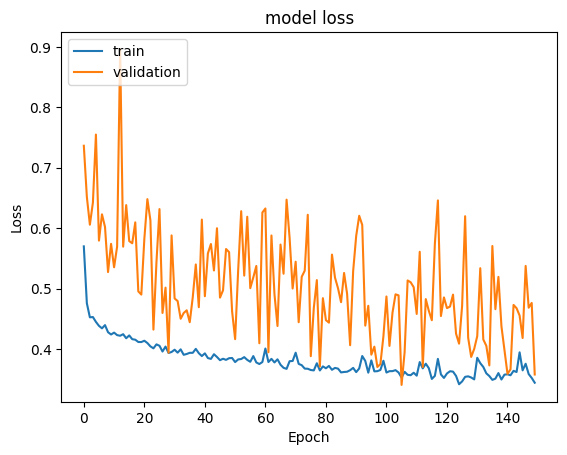

In [74]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations On Model Loss**
* This tuning significantly reduced validation loss and improved validation/training loss convergence:
  - Added a 4th hidden layer
  - Increased Adam optimizer learning rate in steps from 0.001 to 0.02
  - Varied training between 150 and 200 epochs and results at 150 epochs were best.
  - There may be some overtraining which will be addressed in Model 2.

In [75]:
#Initial trial with 0.5 threshold
y_pred=model_1.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [76]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))



    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)


    if title:
        plt.title(title)

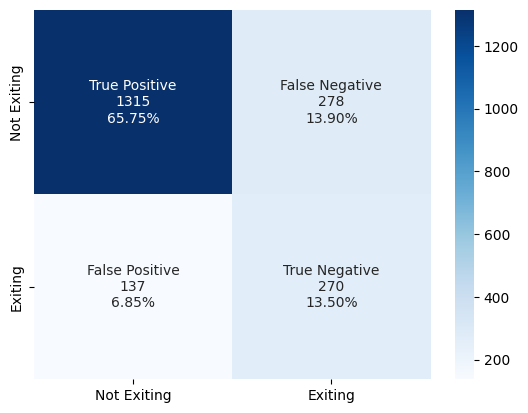

In [77]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observation On Confusion Matrix**
- The recall for predicting customers who will exit is 0.62. This is a lost opportunity cost for the business as a significant
  number of customers who exit are not identified as those who should be targeted for retention.  
- In this case 0.5 was used as the threshold to the model. We will also calculate the threshold using the AUC-ROC curve.

In [78]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.83      0.86      1593
           1       0.49      0.66      0.57       407

    accuracy                           0.79      2000
   macro avg       0.70      0.74      0.71      2000
weighted avg       0.82      0.79      0.80      2000



**Observations On Model 1**

* F1-score for the majority class (did not exit) of 0.85 is much greater than the f1-score for the minority class of 0.53.
* Recall for the majority class (did not exit) of 0.82 is much greater than the recall for the minority class 0.62.
* Precision for the majority class (did not exit) of 0.89 is much greater than the precision for the minority class 0.47.

**Tune the threshold using ROC-AUC and select the threshold with the largest G-Mean value**

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.413027, G-Mean=0.752


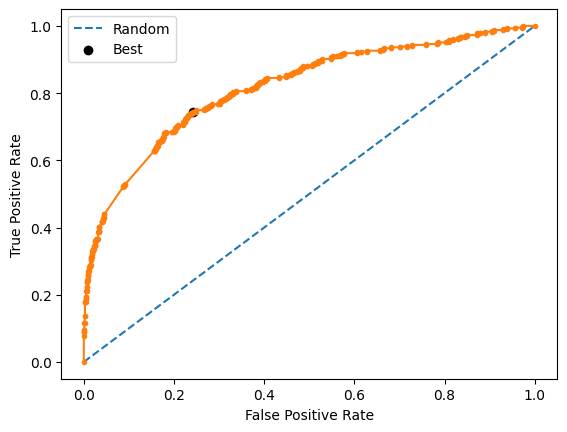

In [79]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model_1.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Random')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

* Optimum threshold is at threshold of 0.316031

In [80]:
#Predicting the results using best as a threshold
y_pred_e1=model_1.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [ True]])

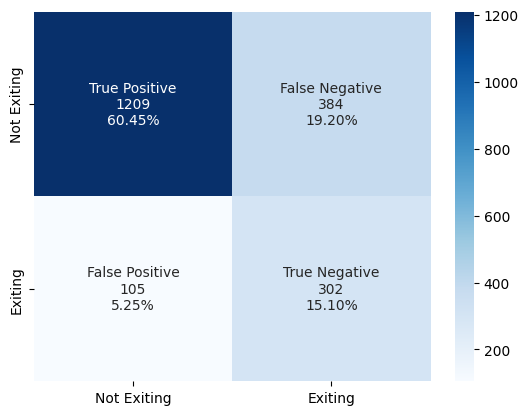

In [81]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observation On Confusion Matrix**
- The recall for predicting customers who will exit increased to 0.75. This is a reduction in opportunity cost for the business
  as more customers who exit are identified as those who should be targeted for retention.  
- In this case 0.316031 (threshold with largest G-mean value) was used as the threshold to the model.

In [82]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.76      0.83      1593
           1       0.44      0.74      0.55       407

    accuracy                           0.76      2000
   macro avg       0.68      0.75      0.69      2000
weighted avg       0.82      0.76      0.77      2000



**Observations On Model 1 With Maximized G-Mean ROC-AUC Threshold**

* F1-score for the majority class (did not exit) of 0.79 is much greater than the f1-score for the minority class of 0.51.
* Recall for the majority class (did not exit) of 0.70 is slightly less than the recall for the minority class 0.75.
* Precision for the majority class (did not exit) of 0.92 is much greater than the precision for the minority class 0.39.

**Tune by further lowering the threshold to increase minority class recall**

In [83]:
#Third trial with 0.18 threshold
y_pred=model_1.predict(X_test)
y_pred = (y_pred > 0.18)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

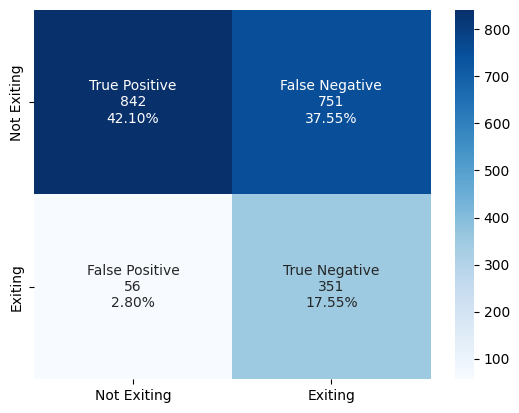

In [84]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations On Confusion Matrix**
- The recall for predicting customers who will exit increased to 0.81. This is a further reduction in opportunity cost for the
  business as more customers who exit are identified as those who should be targeted for retention.  
- In this case 0.18 (less than the threshold with largest G-mean value) was used as the threshold.

In [85]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.53      0.68      1593
           1       0.32      0.86      0.47       407

    accuracy                           0.60      2000
   macro avg       0.63      0.70      0.57      2000
weighted avg       0.81      0.60      0.63      2000



**Observations On Model 1 With Threshold Reduced Below The Maximized G-Mean ROC-AUC Threshold**

* F1-score for the majority class (did not exit) of 0.73 is much greater than the f1-score for the minority class of 0.48.
* Recall for the majority class (did not exit) of 0.60 is lower than the recall for the minority class 0.81.
* Precision for the majority class (did not exit) of 0.92 is much greater than the precision for the minority class 0.34.

**Observations On Model 1 Performance To Be Adressed In Model 2**

* The plot of Model 1 training loss vs. validation loss indicated a potential for overtraining.  
* With a 0.5 threshold, the Model 1 test recall for those who exited was a relatively low value of 0.62
* Dropout will be implemented in Model 2 to determine if this will reduce potential overtraining.
* Model 2 will employ a much greater number of nodes to determine if recall for the miority class (those who exited) is improved.
* A different optimizer (RMSprop) will be used in Model 2 to determine if recall for the customers who exited is improved.

### Model 2

In [92]:
# Clearing backend
backend.clear_session()

In [93]:
#Set Random Seed
np.random.seed(1)
import random
random.seed(1)
tf.random.set_seed(1)

In [94]:
# Initializing the ANN
model_2 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
model_2.add(Dense(activation = 'relu', input_dim = 13, kernel_initializer='he_uniform', units=256))
#Add 1st hidden layer
model_2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dropout(0.15))
#Add 2nd hidden layer
model_2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dropout(0.15))
#Add 3rd hidden layer
model_2.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dropout(0.15))
#Add 4th hidden layer
model_2.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
model_2.add(Dropout(0.15))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 1 node, which is the the desired dimensions of the output (exit or not)
# We use the sigmoid because we want probability outcomes
model_2.add(Dense(1, activation = 'sigmoid'))

In [95]:
# Initializing the Optimizer
optimizer = RMSprop( learning_rate=0.001)
# Compiling the model with 'binary_crossentropy' as loss function and accuracy as metric
model_2.compile(loss = 'binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])


In [96]:
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3584      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0

In [97]:
history_2 = model_2.fit(X_sm,
                    y_sm,
                    validation_split=0.2,
                    epochs=150)

Epoch 1/150
319/319 [==============================] - 4s 5ms/step - loss: 0.6174 - accuracy: 0.6675 - val_loss: 0.7585 - val_accuracy: 0.5667
Epoch 2/150
319/319 [==============================] - 1s 4ms/step - loss: 0.5615 - accuracy: 0.7150 - val_loss: 0.6926 - val_accuracy: 0.5887
Epoch 3/150
319/319 [==============================] - 1s 4ms/step - loss: 0.5206 - accuracy: 0.7521 - val_loss: 0.6376 - val_accuracy: 0.6103
Epoch 4/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4803 - accuracy: 0.7747 - val_loss: 0.6960 - val_accuracy: 0.5306
Epoch 5/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4680 - accuracy: 0.7823 - val_loss: 0.6120 - val_accuracy: 0.6589
Epoch 6/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4546 - accuracy: 0.7928 - val_loss: 0.6254 - val_accuracy: 0.6507
Epoch 7/150
319/319 [==============================] - 1s 4ms/step - loss: 0.4494 - accuracy: 0.7962 - val_loss: 0.5360 - val_accuracy: 0.7276

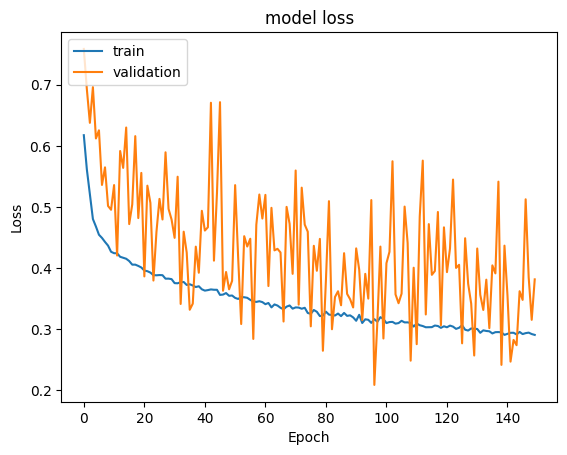

In [98]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Observations On Model Loss**
* This tuning significantly reduced validation loss and improved validation/training loss convergence:
  - Implemented a 4th hidden layer
  - Decreased RMSprop intial learning rate from a starting point of 0.02 to the default value of 0.001
  - Varied training between 150 and 200 epochs and results at 150 epochs were best.

In [99]:
#Initial trial with 0.5 threshold
y_pred=model_2.predict(X_test)
y_pred = (y_pred > 0.5)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

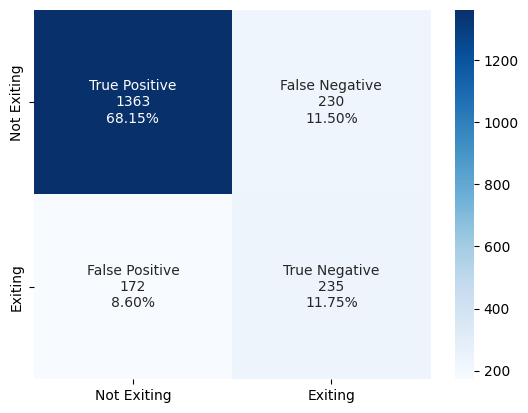

In [100]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observation On Confusion Matrix**
- The recall for predicting customers who will exit is 0.60. This is a lost opportunity cost for the business as a significant
  number of customers who exit are not identified as those who should be targeted for retention.  
- In this case 0.5 was used as the threshold to the model. We will also calculate the threshold using the AUC-ROC curve.

In [101]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1593
           1       0.51      0.58      0.54       407

    accuracy                           0.80      2000
   macro avg       0.70      0.72      0.71      2000
weighted avg       0.81      0.80      0.80      2000



**Observations On Model 2**

* F1-score for the majority class (did not exit) of 0.86 is much greater than the f1-score for the minority class of 0.54.
* Recall for the majority class (did not exit) of 0.84 is much greater than the recall for the minority class 0.60.
* Precision for the majority class (did not exit) of 0.89 is much greater than the precision for the minority class 0.48.

**Tune the threshold using ROC-AUC and select the threshold with the largest G-Mean value**

63/63 [==============================] - 0s 1ms/step
Best Threshold=0.187673, G-Mean=0.733


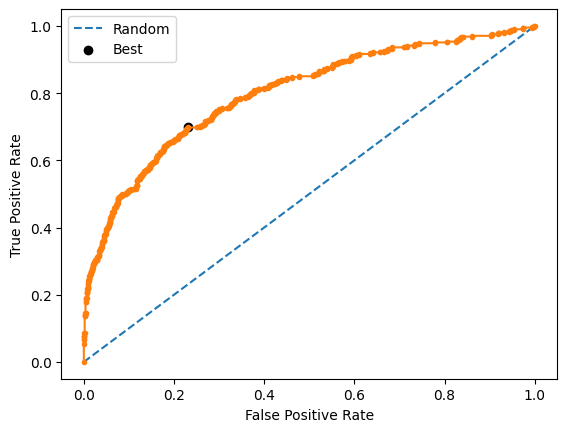

In [102]:
from sklearn.metrics import roc_curve

from matplotlib import pyplot


# predict probabilities
yhat1 = model_2.predict(X_test)
# keep probabilities for the positive outcome only
yhat1 = yhat1[:, 0]
# calculate roc curves
fpr, tpr, thresholds1 = roc_curve(y_test, yhat1)
# calculate the g-mean for each threshold
gmeans1 = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans1)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds1[ix], gmeans1[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='Random')
pyplot.plot(fpr, tpr, marker='.')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

* Optimum threshold is at threshold of 0.194012

In [103]:
#Predicting the results using best as a threshold
y_pred_e1=model_2.predict(X_test)
y_pred_e1 = (y_pred_e1 > thresholds1[ix])
y_pred_e1

63/63 [==============================] - 0s 1ms/step


array([[False],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

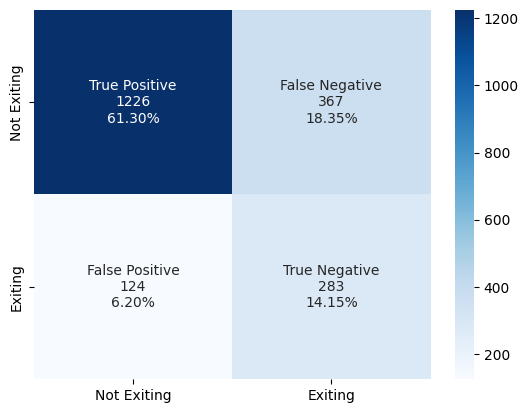

In [104]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred_e1)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observation On Confusion Matrix**
- The recall for predicting customers who will exit increased to 0.77. This is a reduction in opportunity cost for the business
  as more customers who exit are identified as those who should be targeted for retention.  
- In this case 0.194012 (threshold with largest G-mean value) was used as the threshold to the model.

In [105]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred_e1)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1593
           1       0.44      0.70      0.54       407

    accuracy                           0.75      2000
   macro avg       0.67      0.73      0.68      2000
weighted avg       0.81      0.75      0.77      2000



**Observations On Model 2 With Maximized G-Mean ROC-AUC Threshold**

* F1-score for the majority class (did not exit) of 0.81 is much greater than the f1-score for the minority class of 0.53.
* Recall for the majority class (did not exit) of 0.71 is less than the recall for the minority class 0.77.
* Precision for the majority class (did not exit) of 0.92 is much greater than the precision for the minority class of 0.41.

**Tune by further lowering the threshold to increase minority class recall**

In [106]:
#Third trial with 0.15 threshold
y_pred=model_1.predict(X_test)
y_pred = (y_pred > 0.15)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[False],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

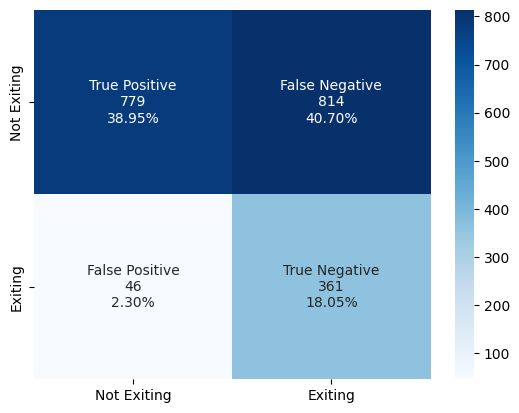

In [107]:
#Calculating the confusion matrix
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test, y_pred)
labels = ['True Positive','False Negative','False Positive','True Negative']
categories = [ 'Not Exiting','Exiting']
make_confusion_matrix(cm1,
                      group_names=labels,
                      categories=categories,
                      cmap='Blues')

**Observations On Confusion Matrix**
- The recall for predicting customers who will exit increased to 0.81. This is a further reduction in opportunity cost for the
  business as more customers who exit are identified as those who should be targeted for retention.  
- In this case 0.15 (less than the threshold with largest G-mean value) was used as the threshold.

In [108]:
#Accuracy as per the classification report
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.94      0.49      0.64      1593
           1       0.31      0.89      0.46       407

    accuracy                           0.57      2000
   macro avg       0.63      0.69      0.55      2000
weighted avg       0.81      0.57      0.61      2000



**Observations On Model 2 With Threshold Reduced Below The Maximized G-Mean ROC-AUC Threshold**

* F1-score for the majority class (did not exit) of 0.71 is much greater than the f1-score for the minority class of 0.47.
* Recall for the majority class (did not exit) of 0.58 is much lower than the recall for the minority class 0.81.
* Precision for the majority class (did not exit) of 0.92 is much greater than the precision for the minority class 0.33.

## Model Comparison

In [109]:
# Build dataframe for Model 1 testing scores for minority class (those who exited)
model1_params = {
        "Mode l": [
            "Model_1 0.5 Threshold",
            "Model_1 AUC-ROC Optimum Threshold 0.32",
            "Model_1 Reduced Threshold 0.18"
        ],
        "Precision" : [0.47, 0.39, 0.34],
        "Recall" : [0.62, 0.75, 0.81],
        "F1-Score" : [0.53, 0.51, 0.48]
    }
df_model1 = pd.DataFrame(model1_params)


In [110]:
# Build dataframe for Model 2 testing scores for minority class (those who exited)
model2_params = {
        "Model 2": [
            "Model_2 0.5 Threshold",
            "Model_2 AUC-ROC Optimum Threshold 0.19",
            "Model_2 Reduced Threshold 0.15"
        ],
        "Precision" : [0.48, 0.41, 0.33],
        "Recall" : [0.60, 0.77, 0.81],
        "F1-Score" : [0.54, 0.53, 0.47]
    }
df_model2 = pd.DataFrame(model2_params)


In [111]:
#Summary of Model 1 test statistics for minority class (those who exited)
#Print test statistics
print(df_model1)

                                   Mode l  Precision  Recall  F1-Score
0                   Model_1 0.5 Threshold       0.47    0.62      0.53
1  Model_1 AUC-ROC Optimum Threshold 0.32       0.39    0.75      0.51
2          Model_1 Reduced Threshold 0.18       0.34    0.81      0.48


In [112]:
#Summary of Model 2 test statistics for minority class (those who exited)
#Print test statistics
print(df_model2)

                                  Model 2  Precision  Recall  F1-Score
0                   Model_2 0.5 Threshold       0.48    0.60      0.54
1  Model_2 AUC-ROC Optimum Threshold 0.19       0.41    0.77      0.53
2          Model_2 Reduced Threshold 0.15       0.33    0.81      0.47


**Observations On Model Performance**

- Performance of Model 1, (no dropout and Adam optimizer) was determined to be marginally superior to Model 2, (with dropout
  and RMSprop optimizer).
- Evaluation thresholds for both models were reduced to the extent necessary to achieve an 81% recall for the minority class
  (those who exited).
- With threshold adjusted to achieve an equivalent recall for both models, Model 1 had a slightly greater precision and recall
  for those who exited.

# # Actionable Insights and Recommendations

* Models were evaluated with SMOTE oversampling and without SMOTE oversampling.  The models presented reflect SMOTE oversampling implementation due to the improved performance attributed to SMOTE.

* Performance of Model 1 was determined to be marginally superior to Model 2.

* Efforts to retain customers in Germany should be improved as 32.4% of customers in Germany exited compared to 16.7% of customers in France and 16.2% of customers in Spain who exited.

* Retention of customers true for ISActiveMember is 85.7% while retention of customers false for IsActiveMember is 73.1%. Efforts to attract customers to be true for IsActiveMember should be emphasized.

* The median age of customers who exited is 45.0 and is significantly greater than the median age of 36.0 for those who did not exit. The 25 percentile for those who exited is 38.0 and the 75 percentile for those who exited is 51.0.  Customers in this age range should be targeted with retention programs.

* The median balance of customers who exited is 109349.3 compared to the median balance of 92072.7 for customers who did not exit. Customers with a balance greater than or equal to the median of 109349.3 for customers who exited, should be targeted by a customer retention program.

* The median number Of products for customers who exited is 1.0 and the median number of products for those who did not exit is 2.0. The company should institute programs to incentivize customers to use an increased number Of products.

* Efforts to attract customers to be positive for IsActiveMember should be emphasized. Only 14.3% of customers positive of IsActiveMember exited while 26.9% of customers false for IsActiveMember exited.

* Outreach to retain female customers should be implemented. Only 16.5% of male customers exited while 25.1% of female customers exited.

* True or false staus for HasCrCard was determined to not be an imprortant factor. Customers true for HasCrCard exited at a rate of 20.2% while customers false for HasCrCard exited at a rate of 20.8%.



